In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Matplotlib is building the font cache; this may take a moment.


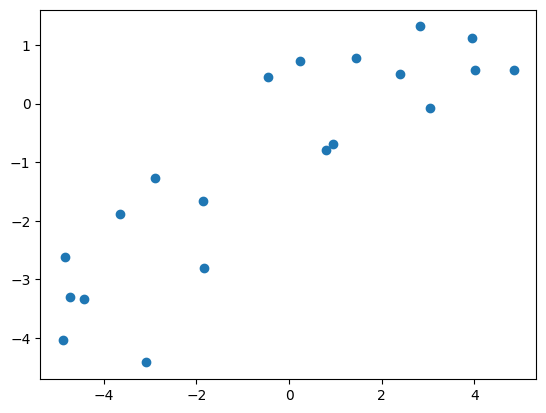

In [14]:
# we would like to generate 20 data points 
N = 20
# random data on the x-axis in (-5, +5)
X = np.random.random(N) *10 - 5
Y = 0.5 * X - 1 + np.random.randn(N)
plt.scatter (X, Y);

In [15]:
# Create the Linear regression model
model = nn.Linear(1,1)

In [16]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters())

In [17]:
X = X.reshape(N,1)
Y = Y.reshape(N,1)
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [18]:
type(inputs)

torch.Tensor

In [19]:
# Train the model
n_epocs = 30
losses = []
for it in range(n_epocs):
    # zero the 
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    print(f'Epoch {it+1}/{n_epocs}, Loss {loss.item():.4f}')

Epoch 1/30, Loss 2.0297
Epoch 2/30, Loss 1.9784
Epoch 3/30, Loss 1.9292
Epoch 4/30, Loss 1.8820
Epoch 5/30, Loss 1.8368
Epoch 6/30, Loss 1.7935
Epoch 7/30, Loss 1.7519
Epoch 8/30, Loss 1.7121
Epoch 9/30, Loss 1.6739
Epoch 10/30, Loss 1.6374
Epoch 11/30, Loss 1.6023
Epoch 12/30, Loss 1.5687
Epoch 13/30, Loss 1.5365
Epoch 14/30, Loss 1.5056
Epoch 15/30, Loss 1.4760
Epoch 16/30, Loss 1.4476
Epoch 17/30, Loss 1.4204
Epoch 18/30, Loss 1.3944
Epoch 19/30, Loss 1.3694
Epoch 20/30, Loss 1.3455
Epoch 21/30, Loss 1.3225
Epoch 22/30, Loss 1.3005
Epoch 23/30, Loss 1.2794
Epoch 24/30, Loss 1.2592
Epoch 25/30, Loss 1.2398
Epoch 26/30, Loss 1.2213
Epoch 27/30, Loss 1.2035
Epoch 28/30, Loss 1.1864
Epoch 29/30, Loss 1.1700
Epoch 30/30, Loss 1.1544


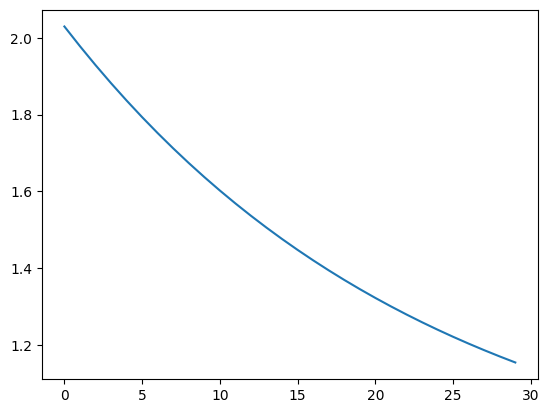

In [20]:
plt.plot(losses)

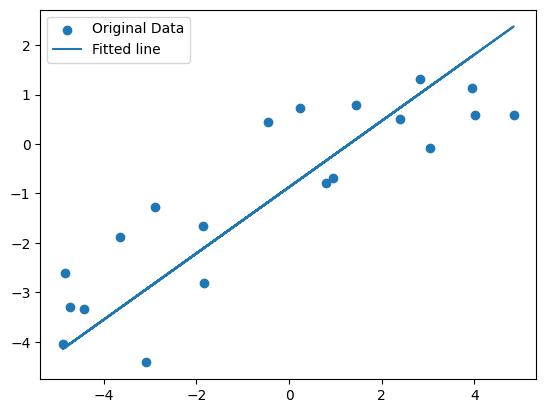

In [21]:
# Plot the graph
prediction = model(inputs).detach().numpy()
plt.scatter(X,Y,label='Original Data')
plt.plot(X,prediction,label='Fitted line')
plt.legend()
plt.show()

In [22]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
w,b

(array([[0.66995776]], dtype=float32), array([-0.8712357], dtype=float32))